In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("../../preprocessed_data/preprocessed_ids2018_subset_after_research.csv")

# Quick check
print("Shape:", df.shape)
df.head()


Shape: (2098077, 35)


,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Max,Bwd Pkt Len Std,Flow Byts/s,...,Pkt Size Avg,Fwd Seg Size Avg,Subflow Fwd Byts,Subflow Bwd Pkts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Mean,Idle Max,Label
0,0.978123,0.128683,0.474801,0.490212,0.109052,0.478933,0.058420,0.077661,0.474985,0.000059,...,0.801460,0.058420,0.490212,0.505639,0.957596,0.222457,0.125,0.000013,0.000017,1
1,0.978123,0.850330,0.251989,0.000000,0.000053,0.000000,0.000049,0.000000,0.000027,0.000000,...,0.000023,0.000049,0.000000,0.000000,0.236993,0.000000,0.125,0.000013,0.000017,1
2,0.978123,0.005754,0.474801,0.490212,0.109052,0.478933,0.058420,0.077661,0.474985,0.000092,...,0.801460,0.058420,0.490212,0.505639,0.957596,0.222457,0.125,0.000013,0.000017,1
3,0.978123,0.673610,0.251989,0.000000,0.000053,0.000000,0.000049,0.000000,0.000027,0.000000,...,0.000023,0.000049,0.000000,0.000000,0.236993,0.000000,0.125,0.000013,0.000017,1
4,0.978123,0.005611,0.474801,0.490212,0.109052,0.478933,0.058420,0.077661,0.474985,0.000092,...,0.801460,0.058420,0.490212,0.505639,0.957596,0.222457,0.125,0.000013,0.000017,1


In [2]:
# Select only numeric features
# We only want to correlate numeric columns, not the Label.
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Label'], errors='ignore')

# Compute Pearson correlation
corr = numeric_df.corr()
print(corr.shape)

# Pearson correlation is standard for continuous numeric data. It measures linear relationships.


(34, 34)


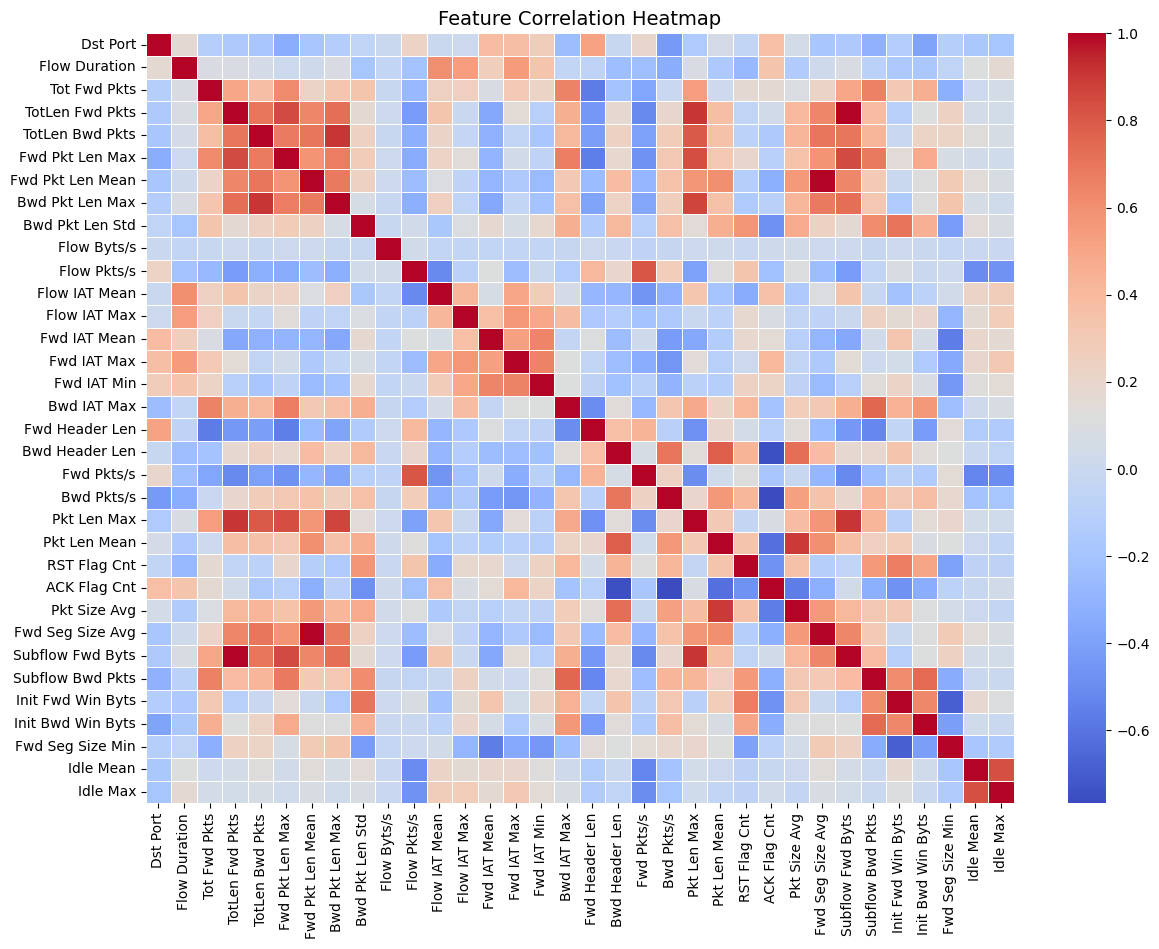

Highly correlated feature pairs (>0.9):
Bwd Pkt Len Max ↔ TotLen Bwd Pkts : 0.90
Pkt Len Max ↔ TotLen Fwd Pkts : 0.91
Fwd Seg Size Avg ↔ Fwd Pkt Len Mean : 1.00
Subflow Fwd Byts ↔ TotLen Fwd Pkts : 1.00
Subflow Fwd Byts ↔ Pkt Len Max : 0.91


In [3]:
# Correlation Analysis is a way to measure how two numeric features move together.

# Positive correlation (+1) → When one feature increases, the other tends to increase too.
# Negative correlation (-1) → When one feature increases, the other tends to decrease.
# No correlation (0) → No linear relationship between them.

# A heatmap is just a visual representation of these correlations:
# Each cell in the heatmap shows the correlation between two features.
# The color tells you whether the correlation is strong (red = positive, blue = negative) or weak (white/light).

# Think of it like a map of relationships between all your numeric features.



# Plot the heatmap
# visualize the matrix using Seaborn

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5,
    annot=False
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


# Focus on highly correlated features
# If we want to find which pairs are too similar (> 0.9), we can extract them programmatically:

# Get the upper triangle of the correlation matrix
upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

# Find features with correlation > 0.9
high_corr = [
    (column, row, corr_value)
    for column in upper.columns
    for row, corr_value in upper[column].items()
    if abs(corr_value) > 0.9
]

print("Highly correlated feature pairs (>0.9):")
for a, b, c in high_corr:
    print(f"{a} ↔ {b} : {c:.2f}")



# This tells us which columns might be redundant, and we can later consider dropping one from each pair during feature selection.

## Why we use it in IDS (and in this dataset)?

1. Detect Redundant Features:
* IDS datasets like CSE-CIC-IDS2018 often have features that are very similar (e.g., Tot Fwd Pkts and TotLen Fwd Pkts).
* If two features are highly correlated (close to +1 or -1), keeping both doesn’t add new information.

2. Simplify Your Model:
* Removing redundant features can make your classifier faster, use less memory, and generalize better.

3. Understand Feature Relationships:
* Seeing which features move together gives you intuition about traffic behavior.

## To summarize:
* Correlation analysis with a heatmap tells you which features are related, helps identify redundant ones, and guides feature selection.
